In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from analysis.data_loader import DataLoader
from analysis.sentiment_analyzer import SentimentAnalyzer
from analysis.stock_analysis import StockAnalysis
from analysis.visualizer import Visualizer

In [2]:
#  Initialize classes and load data

news_data_path = '../data/raw_analyst_ratings.csv'
stock_data_dir = '../data/yfinance_data/'

data_loader = DataLoader(news_data_path, stock_data_dir)
sentiment_analyzer = SentimentAnalyzer()
stock_analysis = StockAnalysis()
visualizer = Visualizer()

news_data = data_loader.load_news_data()
stock_data = data_loader.load_all_stock_data()


In [3]:
#Perform sentiment analysis
news_data['Sentiment'] = news_data['headline'].apply(sentiment_analyzer.analyze_sentiment)
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


In [4]:
# Initialize dictionaries to store results
correlation_results = {}

Processing data for AAPL...


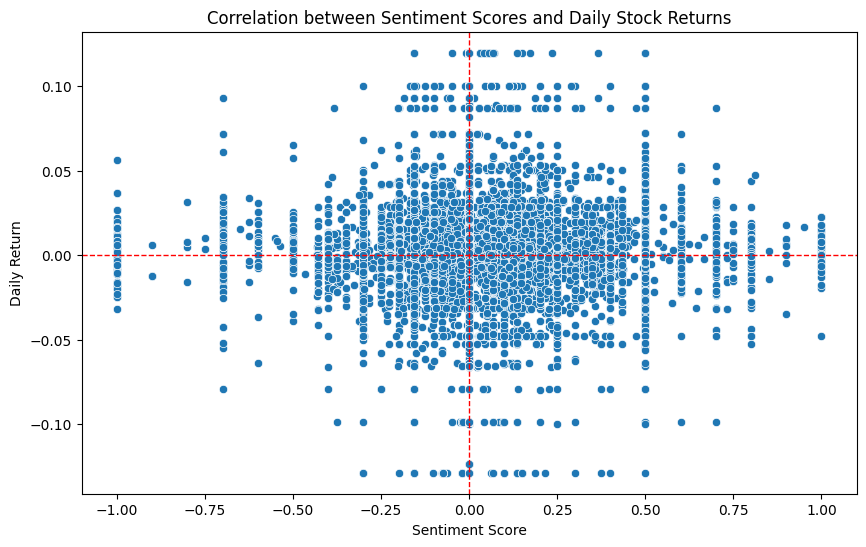

Processing data for AMZN...


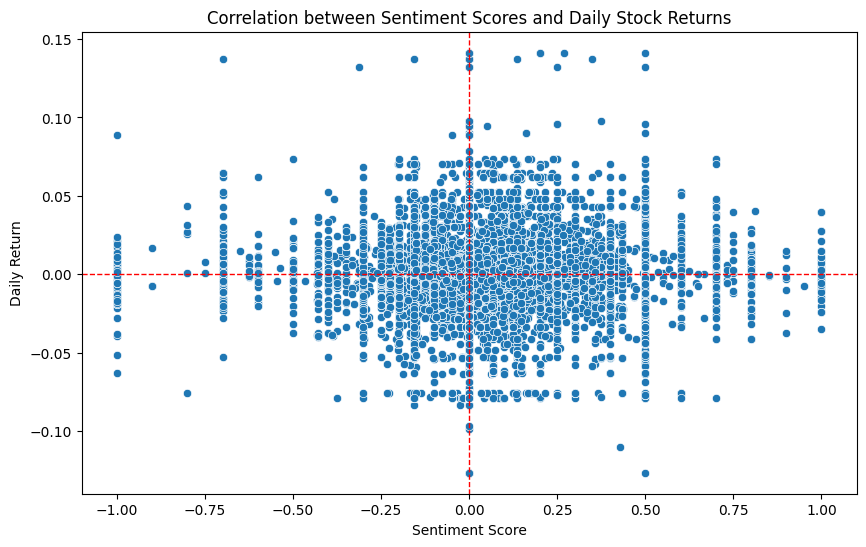

Processing data for GOOG...


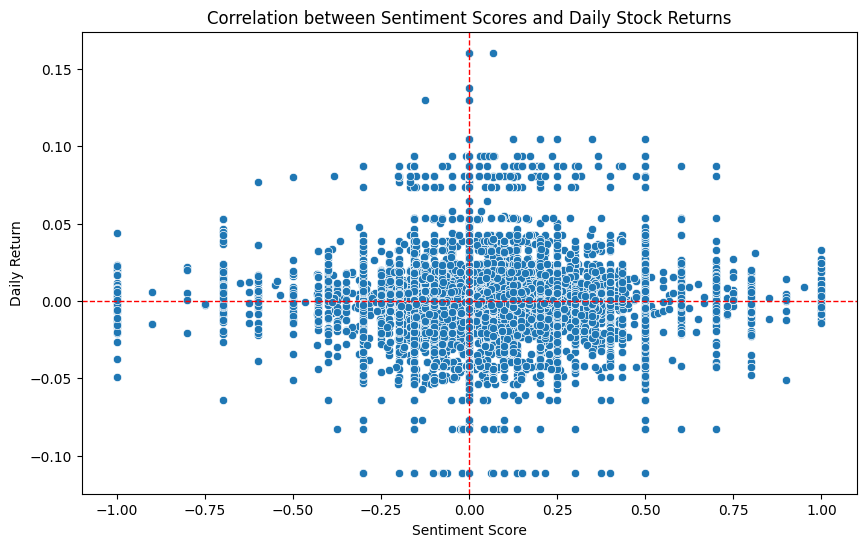

Processing data for META...


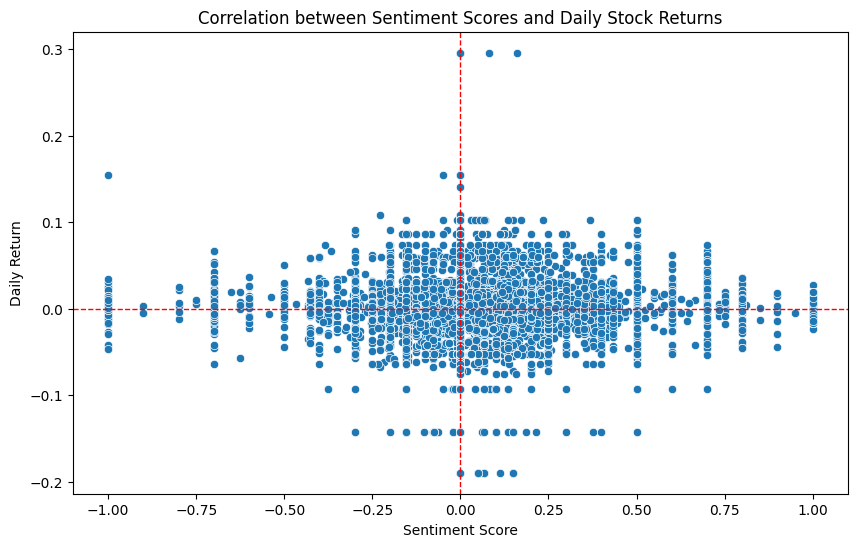

Processing data for MSFT...


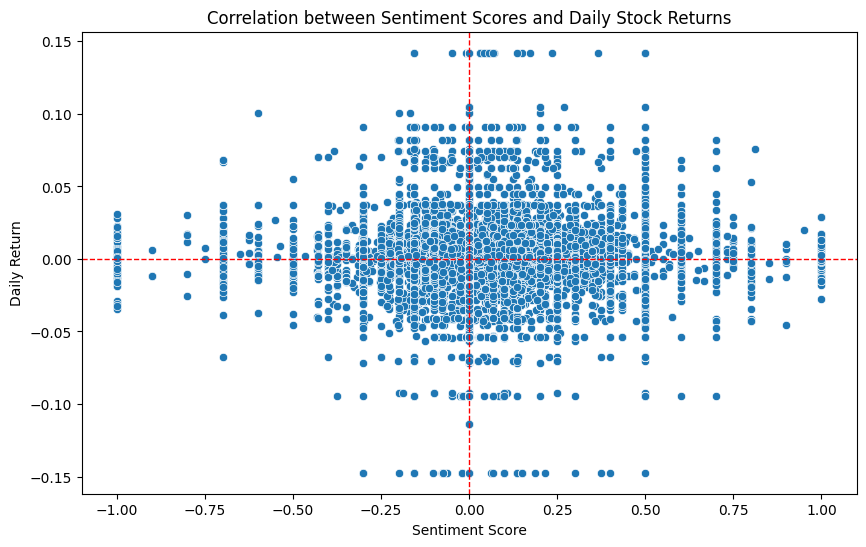

Processing data for NVDA...


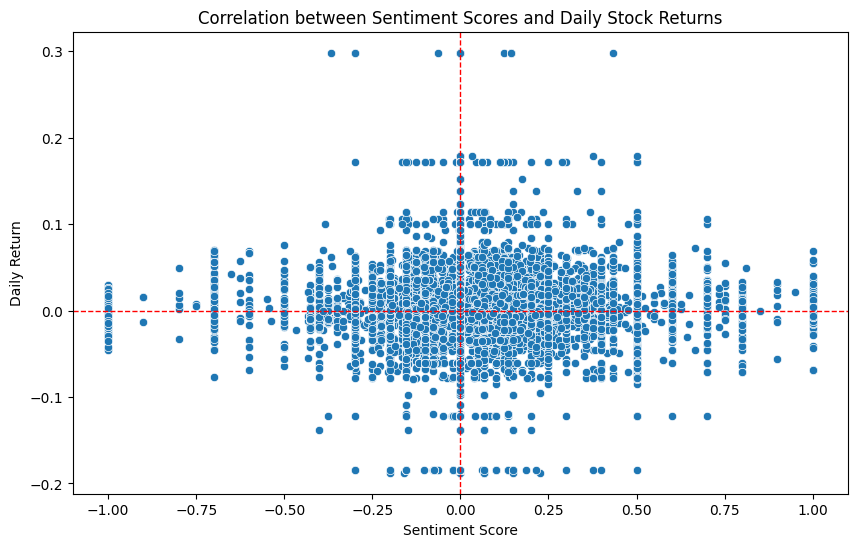

Processing data for TSLA...


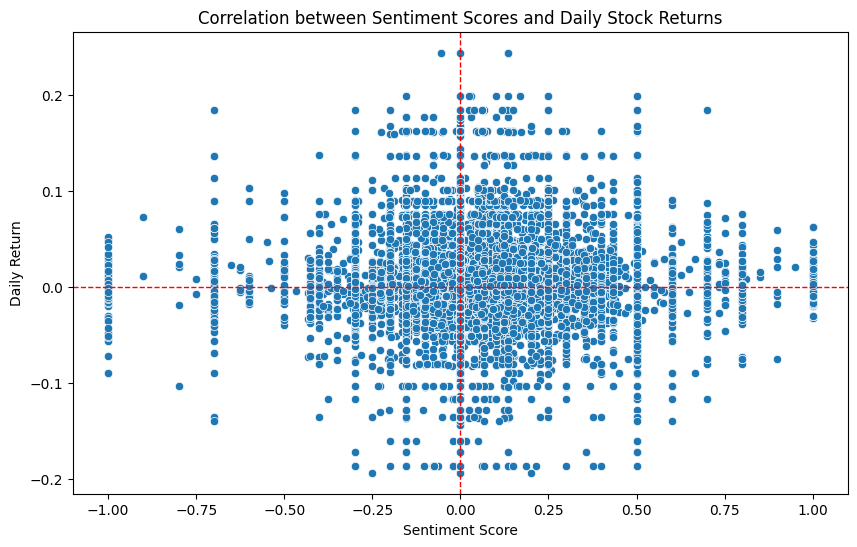

In [5]:
# Cell: Process each stock and analyze correlation
for ticker, data in stock_data.items():
    print(f"Processing data for {ticker}...")
    
    # Calculate daily returns
    data = stock_analysis.calculate_daily_returns(data)
    
    # Merge news data with stock data
    merged_data = stock_analysis.merge_data(news_data, data)
    
    # Calculate correlation between sentiment and stock returns
    correlation = stock_analysis.calculate_correlation(merged_data)
    
    # Store the correlation result
    correlation_results[ticker] = correlation
    
    # Visualize the correlation
    visualizer.plot_correlation(merged_data)


In [6]:
#Display all correlation results
print("Correlation Results between News Sentiment and Stock Returns:")
for ticker, correlation in correlation_results.items():
    print(f"{ticker}: {correlation:.2f}")

Correlation Results between News Sentiment and Stock Returns:
AAPL: 0.03
AMZN: 0.01
GOOG: 0.03
META: 0.02
MSFT: 0.02
NVDA: 0.00
TSLA: 0.01


In [7]:
# Conclusion cell: Calculate average correlation
average_correlation = sum(correlation_results.values()) / len(correlation_results)
print(f"\nAverage correlation across all stocks: {average_correlation:.2f}")



Average correlation across all stocks: 0.02


In [8]:

# Interpret the result
if average_correlation > 0:
    print("Overall, there is a positive correlation between news sentiment and stock returns, suggesting that positive news sentiment is generally associated with stock price increases.")
elif average_correlation < 0:
    print("Overall, there is a negative correlation between news sentiment and stock returns, suggesting that negative news sentiment is generally associated with stock price decreases.")
else:
    print("Overall, there is no significant correlation between news sentiment and stock returns.")


Overall, there is a positive correlation between news sentiment and stock returns, suggesting that positive news sentiment is generally associated with stock price increases.
